Questions to be considered:


1. Distribution of categories
2. Average reviews for highest ranking
3. Distribution of stars
4. Distribution of restaurants by cities
5. Zoom in more details for one most populous category


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pwd

/Users/lisacombs/Documents/FALL2019/INTRO_DS/Project/notebooks


In [3]:
biz_file_path = '/Users/lisacombs/Documents/FALL2019/INTRO_DS/Project/clean_data/restaurant_open.csv'
biz_att_file_path = '/Users/lisacombs/Documents/FALL2019/INTRO_DS/Project/raw_data/yelp_business_attributes.csv'
# https://www.kaggle.com/yelp-dataset/yelp-dataset/version/4#yelp_business_attributes.csv

In [4]:
biz_df = pd.read_csv(biz_file_path)
biz_att = pd.read_csv(biz_att_file_path)

In [5]:
data = pd.merge(biz_df,biz_att, on='business_id')
data.columns.tolist()[0:10]

['Unnamed: 0',
 'business_id',
 'name',
 'neighborhood',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude']

In [6]:
att = data.columns.tolist()
len(att)

98

In [7]:
data['BusinessParking_street']

data.replace(to_replace='True', value = 1,inplace=True)
data.replace(to_replace='False', value = 0,inplace=True)
data.replace(to_replace='Na', value = 0.5,inplace=True) #only treat this as a categorical variable

In [8]:
data.replace(to_replace= ['beer_and_wine',        'casual',          'free',
            'full_bar',          'loud', 'outdoor',         'quiet',           'yes',      'yes_free', '1', '2'], value = 1,inplace=True)
data.replace(to_replace=['no', 'none'], value = 0,inplace=True)

In [9]:
vegas = data[data['city']=='Las Vegas']
vegas.head()

att = vegas.iloc[:,16:]

In [10]:
features = ['Unnamed: 0',
 'business_id',
 'name',
 'neighborhood',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'is_open',
 'categories',
 'hours',]

In [11]:
d = att.apply(pd.value_counts)

col_names = d.columns.tolist()

In [12]:
d = d.drop(columns ='HairSpecializesIn_coloring')

In [13]:
col = d.loc[:,~(d == att.shape[0]).any()].columns.tolist()
# d.loc[:,~(d == float(att.shape[0])).any()]

In [14]:
colnames = features + col
dataclean = data[colnames]

In [15]:
vegas_clean = dataclean[dataclean['city']=='Las Vegas']

In [16]:
# business_df['categories'].head()
categories_df = vegas_clean['categories'].str.split(',', expand = True)
cat_ls = categories_df.values.flatten()
cat_ls = list(filter(None, cat_ls)) 
cat_ls = np.unique(cat_ls)
print(len(cat_ls))
# # clean the words
# leading whitespace 
cat_ls = [s.strip() for s in cat_ls] 
cat_ls = np.unique(cat_ls)
print(len(cat_ls))

564
387


In [17]:
# make empty columns
for i in cat_ls:
    vegas_clean[i] = 0

In [18]:
# sort by largest categories
cats_df = vegas_clean[vegas_clean.columns[-387:]]

for c in range(0,len(cat_ls)):
    temp_c=str(cats_df.columns.tolist()[c])
    
    for i in range(len(vegas_clean['categories'])):
        if temp_c in str(vegas_clean['categories'].iloc[i]):
            vegas_clean[temp_c].iloc[i] = 1

In [19]:
vegas_clean.describe()
vegas_final = vegas_clean.fillna(vegas_clean.mean())

In [20]:
vegas_final= vegas_final.rename(columns ={'Unnamed: 0': 'org_index'})
# vegas_final.replace(0.5, 0, inplace=True)
vegas_final.head()

,org_index,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,...,Wholesale Stores,Wholesalers,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga
8,32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,Summerlin,2255 N Rampart Blvd,Las Vegas,NV,89128,36.201794,-115.281981,...,0,0,0,0,0,0,0,0,0,0
9,33,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,Summerlin,2227 N Rampart Blvd,Las Vegas,NV,89128,36.201990,-115.283122,...,0,0,0,1,0,0,0,0,0,0
32,141,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,Sunrise,4505 E Bonanza Rd,Las Vegas,NV,89110,36.173140,-115.077945,...,0,0,0,0,0,0,0,0,0,0
34,143,2kWrSFkIes_d2BMg4YrRtA,Pizza Hut,Sunrise,"560 N. Nellis Blvd, Ste E1",Las Vegas,NV,89110,36.169353,-115.061694,...,0,0,0,0,0,0,0,0,0,0
35,145,6llKs7K_tn8ChXcIM-oTvg,Sansei Japan,Eastside,3480 S Maryland Pkwy,Las Vegas,NV,89169,36.125934,-115.135253,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Thank you to Professor Brian Dalessandro for this function which was produced in HW2 for this class.

def getDfSummary(input_data):
    output_data=input_data.describe() 
    output_data.loc['number_distinct'] = input_data.nunique() 
    output_data.loc['number_nan'] = input_data.isna().sum()
    output_data=output_data.drop('count', axis=0)
    output_data=output_data.T
    return output_data

In [22]:
getDfSummary(vegas_final)

,mean,std,min,25%,50%,75%,max,number_distinct,number_nan
org_index,98475.620005,54644.866855,32.000000,50662.500000,101743.000000,144801.000000,188567.000000,3779.0,0.0
latitude,36.130546,0.060171,35.606730,36.100372,36.124829,36.159747,36.430308,3481.0,0.0
longitude,-115.190975,0.070006,-115.679632,-115.243148,-115.175835,-115.144217,-114.896337,3442.0,0.0
stars,3.434110,0.813643,1.000000,3.000000,3.500000,4.000000,5.000000,9.0,0.0
review_count,231.700450,451.108130,3.000000,26.000000,83.000000,260.000000,7968.000000,829.0,0.0
...,...,...,...,...,...,...,...,...,...
Wineries,0.000265,0.016267,0.000000,0.000000,0.000000,0.000000,1.000000,2.0,0.0
Women's Clothing,0.000529,0.023002,0.000000,0.000000,0.000000,0.000000,1.000000,2.0,0.0
Wraps,0.005028,0.070738,0.000000,0.000000,0.000000,0.000000,1.000000,2.0,0.0
Yelp Events,0.000265,0.016267,0.000000,0.000000,0.000000,0.000000,1.000000,2.0,0.0


Selecting business rules to define "success" in our context:

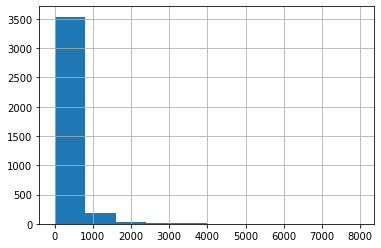

In [23]:
vegas_final['review_count'].hist()

In [24]:
vegas_final['review_count'].describe()

count    3779.00000
mean      231.70045
std       451.10813
min         3.00000
25%        26.00000
50%        83.00000
75%       260.00000
max      7968.00000
Name: review_count, dtype: float64

(0, 500)

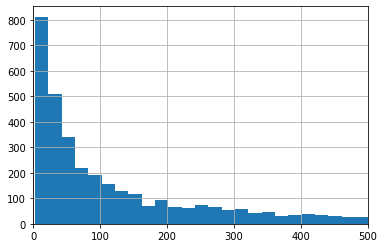

In [25]:
vegas_final['review_count'].hist(bins=400)
plt.xlim(0,500)

In [26]:
vegas_final['stars'].describe()

count    3779.000000
mean        3.434110
std         0.813643
min         1.000000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: stars, dtype: float64

In [27]:
vegas_final[vegas_final['stars'] ==5]['review_count']

617        4
726       19
1125       9
1316      15
1680     249
        ... 
34187    162
34390      7
34393     15
34784     42
35005     32
Name: review_count, Length: 83, dtype: int64

Text(0, 0.5, 'Number of restaurants')

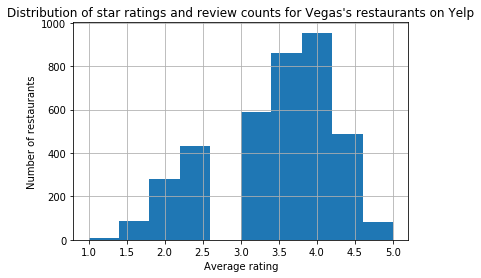

In [28]:
vegas_final['stars'].hist(bins=10)
plt.title('Distribution of star ratings and review counts for Vegas\'s restaurants on Yelp')
plt.xlabel('Average rating')
plt.ylabel('Number of restaurants')

{'whiskers': [<matplotlib.lines.Line2D at 0x125948a58>,
 'caps': [<matplotlib.lines.Line2D at 0x125948e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x125948668>],
 'medians': [<matplotlib.lines.Line2D at 0x1259567b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x125956b00>],
 'means': []}

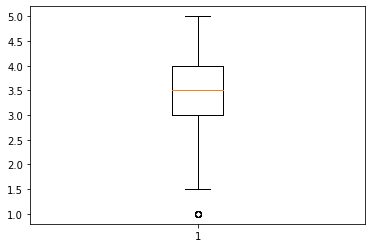

In [29]:
plt.boxplot(vegas_final['stars'])

Create our target variable, named 'Sucess', Y = 1 if success, and = 0 otherwise

In [30]:
vegas_final['success'] = 0
success_list = vegas_final[(vegas_final['review_count']>100) & (vegas_final['stars']>4)].index.tolist()
vegas_final['success'][success_list] = 1

In [31]:
vegas_final.describe()
vegas_final.head(5)

,org_index,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,...,Wholesalers,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,success
8,32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,Summerlin,2255 N Rampart Blvd,Las Vegas,NV,89128,36.201794,-115.281981,...,0,0,0,0,0,0,0,0,0,0
9,33,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,Summerlin,2227 N Rampart Blvd,Las Vegas,NV,89128,36.201990,-115.283122,...,0,0,1,0,0,0,0,0,0,0
32,141,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,Sunrise,4505 E Bonanza Rd,Las Vegas,NV,89110,36.173140,-115.077945,...,0,0,0,0,0,0,0,0,0,0
34,143,2kWrSFkIes_d2BMg4YrRtA,Pizza Hut,Sunrise,"560 N. Nellis Blvd, Ste E1",Las Vegas,NV,89110,36.169353,-115.061694,...,0,0,0,0,0,0,0,0,0,0
35,145,6llKs7K_tn8ChXcIM-oTvg,Sansei Japan,Eastside,3480 S Maryland Pkwy,Las Vegas,NV,89169,36.125934,-115.135253,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Export clean data to csv
vegas_final.to_csv('/Users/lisacombs/Documents/FALL2019/INTRO_DS/Project/clean_data/vegas.csv')

In [33]:
vegas_final.shape

(3779, 453)

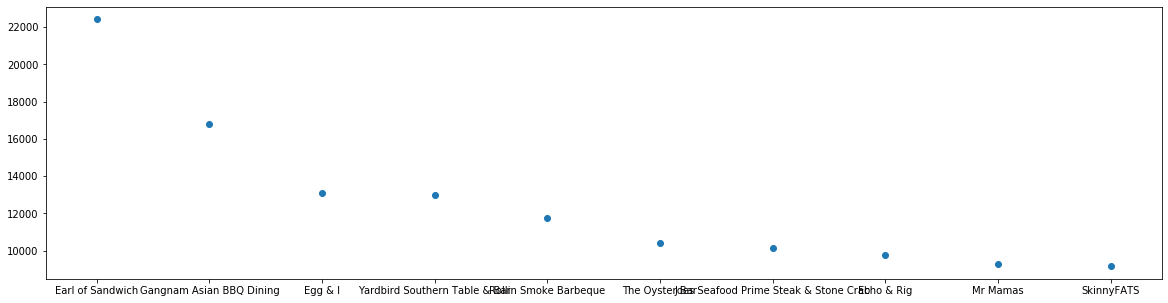

In [34]:
#Plot to compare the restaurants that have highest ratings (and total review counts) vs. lowest ones
#Introduce the interaction term, 'total_stars' = 'review_count'*'stars'

fig,ax = plt.subplots(figsize =[20,5])
vegas_final['total_stars'] = vegas_final['stars']*vegas_final['review_count']
highstar = vegas_final[vegas_final['success']==1].sort_values(['total_stars'],ascending=False)
y = highstar['total_stars'].head(10)
x = highstar['name'].head(10)
plt.scatter(x,y)

# z = df['review_count'].head(10)

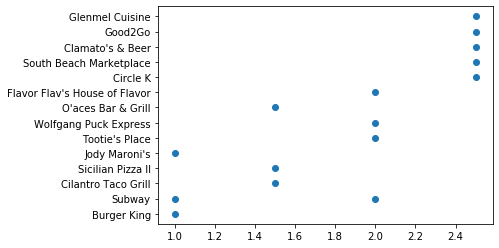

In [35]:
lowstar = vegas_final[vegas_final['success']==0].sort_values(['total_stars'],ascending=True)
y2 = lowstar['stars'].head(15)
x2 = lowstar['name'].head(15)
plt.scatter(y2,x2)

Text(0, 0.5, 'Average rating')

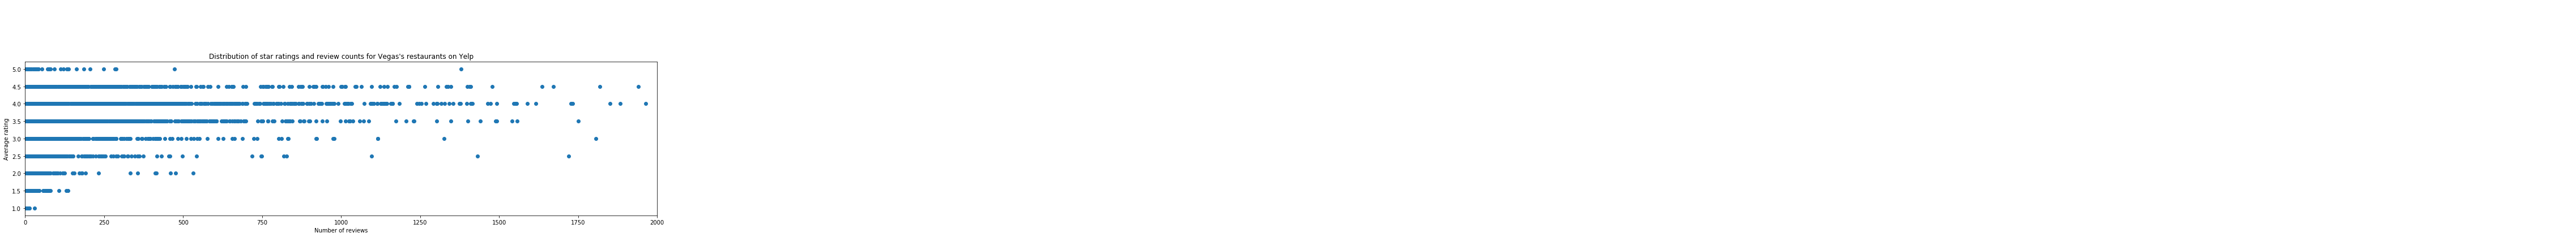

In [36]:
#Plot reviews and stars
fig,ax = plt.subplots(figsize =[20,5])

x_stars = vegas_final['stars']
y_reviews = vegas_final['review_count']
z_name = vegas_final['name']

plt.scatter(y_reviews,x_stars)
plt.xlim(0,2000)

for i, txt in enumerate(z_name):
  if (y_reviews.iloc[i]>2500 and x_stars.iloc[i]>=4.0):
    plt.annotate(txt, (y_reviews.iloc[i], x_stars.iloc[i]),xytext=(-5, 10), textcoords='offset points',ha = 'left',va='bottom', rotation=45 )

plt.title('Distribution of star ratings and review counts for Vegas\'s restaurants on Yelp')
plt.xlabel('Number of reviews')
plt.ylabel('Average rating')